In [1705]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [1706]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing  

In [1707]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [1708]:
df = pd.read_csv('all_auction.csv', encoding = 'utf-8')
df.head()

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
0,2020/12/7,永固一-KY,55461,櫃檯買賣,無擔保轉換公司債,美國標,"6,800",100,1,680,...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
1,2020/12/4,信邦七,30237,櫃檯買賣,無擔保轉換公司債,美國標,"11,400",101,1,"1,140",...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
2,2020/12/4,達亞,6762,櫃檯買賣,初上櫃,美國標,"1,660",228.37,1,238,...,0,4.5,0,0,0,0,0,0.0,NaN,NaN
3,2020/12/3,森寶一,34891,櫃檯買賣,有擔保轉換公司債,美國標,900,103,1,90,...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
4,2020/12/2,揚秦,2755,櫃檯買賣,初上櫃,美國標,"1,360",48,1,178,...,0,5.0,0,0,0,0,0,0.0,NaN,NaN


In [1709]:
df.shape

(210, 24)

## 先清理重複的資料

In [1710]:
df.loc[df['最低得標價格(元)'] != 0, '證券名稱'].value_counts()

聯廣         2
精測         2
泰昇-KY      2
新盛力        1
鋐寶科技       1
          ..
麗清         1
光隆精密-KY    1
昇陽半        1
三貝德        1
科際精密       1
Name: 證券名稱, Length: 207, dtype: int64

In [1711]:
df[df['證券名稱'] =='精測']

## 兩筆為不同事件都要考慮

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
159,2017/9/18,精測,6510,櫃檯買賣,上櫃增資,美國標,"1,530","1,267.33",1,153,...,"1,772,575,830",1.0,216,"1,381","1,267.33","1,320","1,283.55",1267.33,1330.00,1250.0
185,2016/3/10,精測,6510,櫃檯買賣,初上櫃,美國標,1896,300,3,236,...,854748380,2.5,"2,667","17,457",440.2,482,450.82,360.00,478.18,590.0


In [1712]:
df[df['證券名稱'] =='泰昇-KY']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
183,2017/1/3,泰昇-KY,8480,集中交易市場,第一上市初上市,美國標,"3,400",82.31,2,425,...,"381,534,290",2.5,"1,066","12,763",110.22,124,112.22,107.0,NaN,114.5
209,2017/1/3,泰昇-KY,8480,集中市場,第一上市初上市,美國標,3400,82.31,2,425,...,0,2.5,NaN,NaN,0,0,0,0.0,NaN,NaN


In [1713]:
## 刪掉重複的一筆
index_name = df[(df['得標總金額(元)'] == '0') & (df['證券名稱'] =='泰昇-KY')].index
df.drop(index_name, inplace = True)
df.reset_index()
df[df['證券名稱'] =='泰昇-KY']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
183,2017/1/3,泰昇-KY,8480,集中交易市場,第一上市初上市,美國標,"3,400",82.31,2,425,...,"381,534,290",2.5,"1,066","12,763",110.22,124,112.22,107.0,NaN,114.5


In [1714]:
df[df['證券名稱'] =='聯廣']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
137,2018/3/9,聯廣,8497,集中交易市場,初上市,美國標,"4,680",40,1,672,...,"229,545,830",4.0,"1,383","23,949",47.6,53.1,49.05,46.0,58.53,NaN
145,2018/1/8,聯廣,8497,集中交易市場,初上市,美國標,"4,680",47.3,1,672,...,0,4.0,500,"4,308",0,0,0,0.0,70.77,NaN


In [1715]:
## 刪掉流標的那一筆
index_name = df[(df['得標總金額(元)'] == '0') & (df['證券名稱'] =='聯廣')].index
df.drop(index_name, inplace = True)
df.reset_index()
df[df['證券名稱'] =='聯廣']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
137,2018/3/9,聯廣,8497,集中交易市場,初上市,美國標,"4,680",40,1,672,...,"229,545,830",4.0,"1,383","23,949",47.6,53.1,49.05,46.0,58.53,NaN


## 不考慮得標總金額為 0 的資料 (可能是流標 或 正在標)


In [1716]:
index_name = df[(df['得標總金額(元)'] == '0')].index
df.drop(index_name, inplace = True)
df.shape

(199, 24)

In [1717]:
sum(df['得標總金額(元)'] == '0')

0

## 得標總金額為 0 的資料:
* 羅麗芬-ky, 聯廣, 泰福-ky 流標
* 其餘則是還在進行中 (資料取自2020.11.27)

## 將股票和可轉債標示類別

In [1718]:
def label_stock(row):
    if row['發行性質'] in ['有擔保轉換公司債','無擔保轉換公司債']:
        return "cb"
    else:
        return "stock"   

In [1719]:
df['類別'] = df.apply(lambda row : label_stock(row), axis = 1)
print('股票: %i' %(sum(df['類別'] == 'stock')))
print('可轉債: %i' %(sum(df['類別'] == 'cb')))

股票: 173
可轉債: 26


## 將df只選出開標前知道的資訊 + 最低得標價(Y)

In [1720]:
df_1 = df[['開標日期','證券名稱', '證券代號', '發行市場', '發行性質', '競拍數量(張)', '最低投標價格(元)', '最低每標單投標數量(張)','每一投標單投標處理費(元)', '得標手續費率(%)', '投標最後一天平均成交價', '最低得標價格(元)', '撥券日開盤價']]

In [1721]:
df_1.shape

(199, 13)

In [1722]:
df_1.isnull().apply(lambda x: sum(x))

開標日期              0
證券名稱              0
證券代號              0
發行市場              0
發行性質              0
競拍數量(張)           0
最低投標價格(元)         0
最低每標單投標數量(張)      0
每一投標單投標處理費(元)     0
得標手續費率(%)         0
投標最後一天平均成交價      51
最低得標價格(元)         0
撥券日開盤價            7
dtype: int64

In [1723]:
df_1.dropna(inplace = True)
df_1.shape

(145, 13)

In [1724]:
df_1.dtypes

開標日期              object
證券名稱              object
證券代號               int64
發行市場              object
發行性質              object
競拍數量(張)           object
最低投標價格(元)         object
最低每標單投標數量(張)       int64
每一投標單投標處理費(元)      int64
得標手續費率(%)        float64
投標最後一天平均成交價      float64
最低得標價格(元)         object
撥券日開盤價           float64
dtype: object

In [1725]:
## 將這三個變數改為數值變數
obj_col = ['競拍數量(張)', '最低投標價格(元)', '最低得標價格(元)']
for col in obj_col:
    df_1[col] = df_1[col].apply(lambda x: x.replace(',', '')) 
    df_1[col] = df_1[col].apply(pd.to_numeric, errors = 'coerce')

df_1.isnull().apply(lambda x: sum(x))

開標日期             0
證券名稱             0
證券代號             0
發行市場             0
發行性質             0
競拍數量(張)          0
最低投標價格(元)        0
最低每標單投標數量(張)     0
每一投標單投標處理費(元)    0
得標手續費率(%)        0
投標最後一天平均成交價      0
最低得標價格(元)        0
撥券日開盤價           0
dtype: int64

In [1726]:
df_1.dtypes

開標日期              object
證券名稱              object
證券代號               int64
發行市場              object
發行性質              object
競拍數量(張)            int64
最低投標價格(元)        float64
最低每標單投標數量(張)       int64
每一投標單投標處理費(元)      int64
得標手續費率(%)        float64
投標最後一天平均成交價      float64
最低得標價格(元)        float64
撥券日開盤價           float64
dtype: object

C:\Users\hello\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


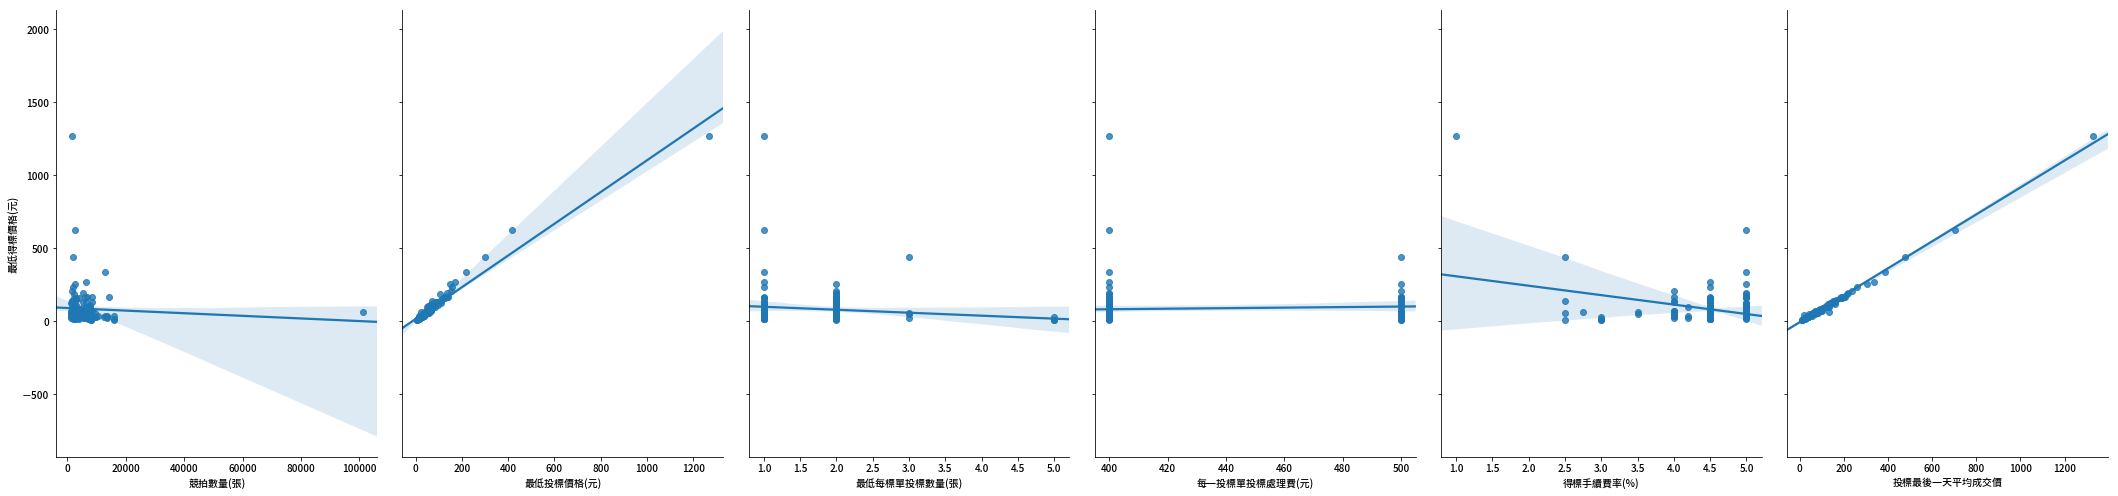

In [1727]:
sn.pairplot(df_1, x_vars=['競拍數量(張)','最低投標價格(元)','最低每標單投標數量(張)','每一投標單投標處理費(元)','得標手續費率(%)','投標最後一天平均成交價'], y_vars='最低得標價格(元)', size=7, aspect=0.7, kind='reg')

In [1728]:
outlier = df_1['最低投標價格(元)'] > 1200
df_1[outlier]

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),每一投標單投標處理費(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元),撥券日開盤價
159,2017/9/18,精測,6510,櫃檯買賣,上櫃增資,1530,1267.33,1,400,1.0,1330.0,1267.33,1250.0


In [1729]:
index = df_1[outlier].index
df_1.drop(index, inplace = True)

In [1730]:
outlier = df_1['競拍數量(張)'] > 80000
df_1[outlier]

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),每一投標單投標處理費(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元),撥券日開盤價
57,2019/11/25,和潤企業,6592,集中交易市場,初上市,101081,45.69,2,400,2.75,130.59,60.88,82.0


In [1731]:
index = df_1[outlier].index
df_1.drop(index, inplace = True)

C:\Users\hello\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


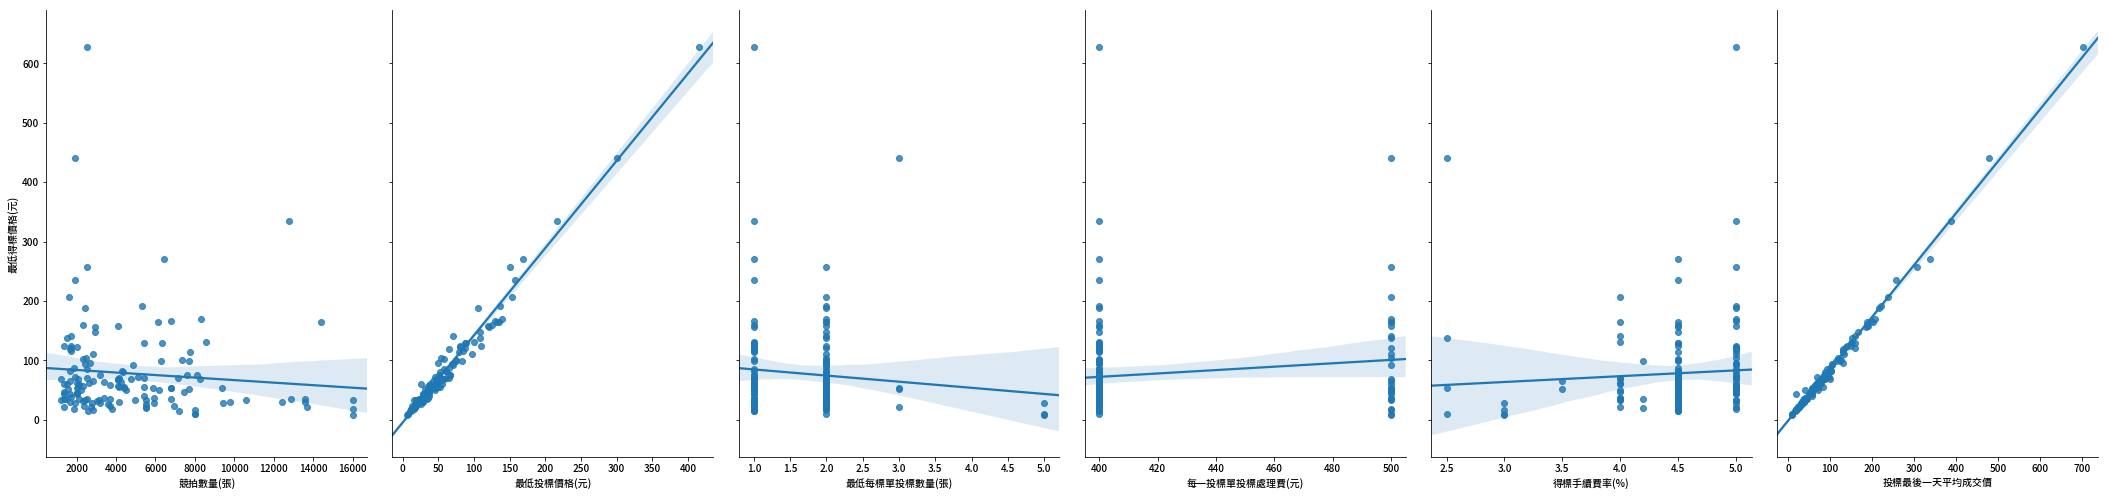

In [1732]:
sn.pairplot(df_1, x_vars=['競拍數量(張)','最低投標價格(元)','最低每標單投標數量(張)','每一投標單投標處理費(元)','得標手續費率(%)','投標最後一天平均成交價'], y_vars='最低得標價格(元)', size=7, aspect=0.7, kind='reg')

In [1733]:
df_1['發行性質'].value_counts()

初上櫃        89
初上市        53
第一上市初上市     1
Name: 發行性質, dtype: int64

In [1734]:
index = df_1[df_1['發行性質']=='第一上市初上市'].index
df_1.drop(index, inplace = True)

In [1735]:
dummies = pd.get_dummies(df_1['發行性質'])
df_1 = pd.concat([df_1, dummies], axis = 1)
df_1.drop(['發行性質'], axis = 1, inplace = True)
df_1.drop(['初上櫃'], axis = 1, inplace = True)   ## 將發行性質轉成類別變數 上市=1, 上櫃=0

In [1736]:
dummies = pd.get_dummies(df_1['每一投標單投標處理費(元)'])
dummies.columns = ['處理費_400','處理費_500']
df_1 = pd.concat([df_1, dummies], axis = 1)
df_1.drop(['每一投標單投標處理費(元)', '處理費_500'], axis = 1, inplace = True)    ## 處理費轉為類別變數 處利費400=1, 500=0

In [1737]:
dummies = pd.get_dummies(df_1['最低每標單投標數量(張)'])
dummies.columns = ['最低每標單投_1','最低每標單投_2','最低每標單投_3','最低每標單投_5']
df_1 = pd.concat([df_1, dummies], axis = 1)
df_1.drop(['最低每標單投標數量(張)', '最低每標單投_5'], axis = 1, inplace = True)
df_1.columns

Index(['開標日期', '證券名稱', '證券代號', '發行市場', '競拍數量(張)', '最低投標價格(元)', '得標手續費率(%)',
       '投標最後一天平均成交價', '最低得標價格(元)', '撥券日開盤價', '初上市', '處理費_400', '最低每標單投_1',
       '最低每標單投_2', '最低每標單投_3'],
      dtype='object')

In [1738]:
df_1.shape

(142, 15)

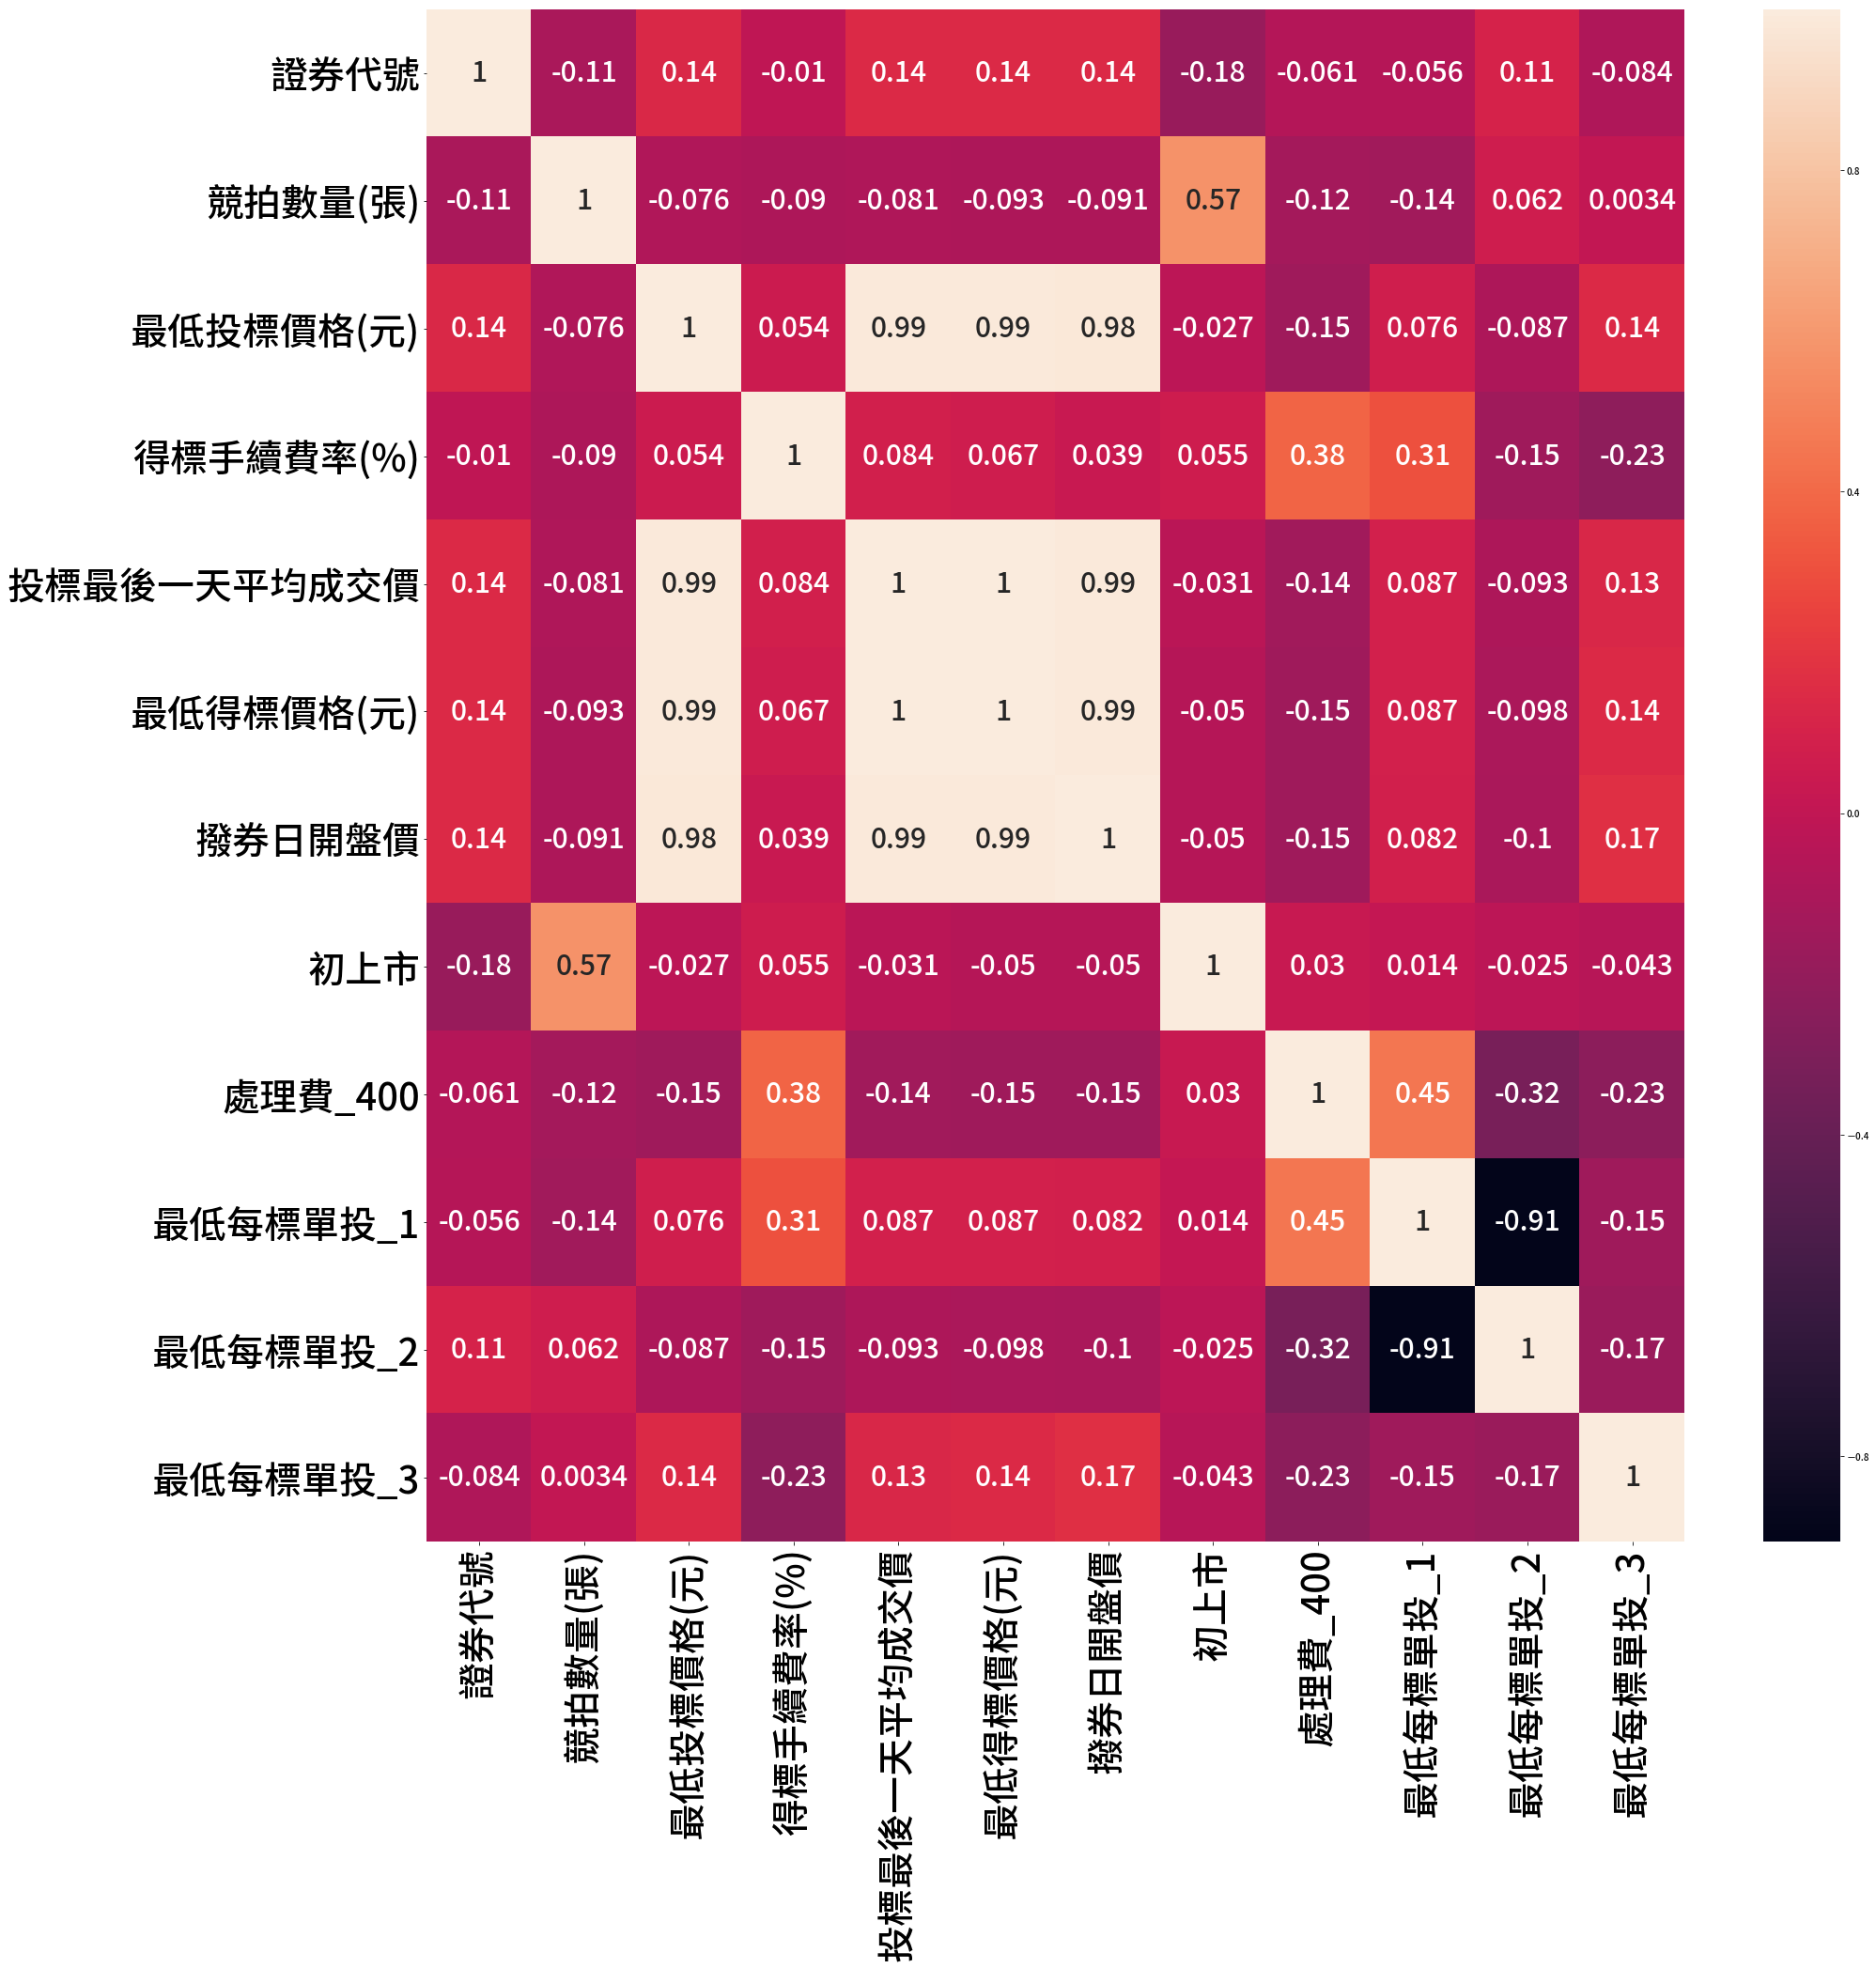

In [1739]:
plt.figure(figsize=(30, 30))
corrMatrix = df_1.corr()

res = sn.heatmap(corrMatrix, annot=True, annot_kws={"size": 30})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 40, rotation = 90)

res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 40, rotation = 0)
plt.show()

C:\Users\hello\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


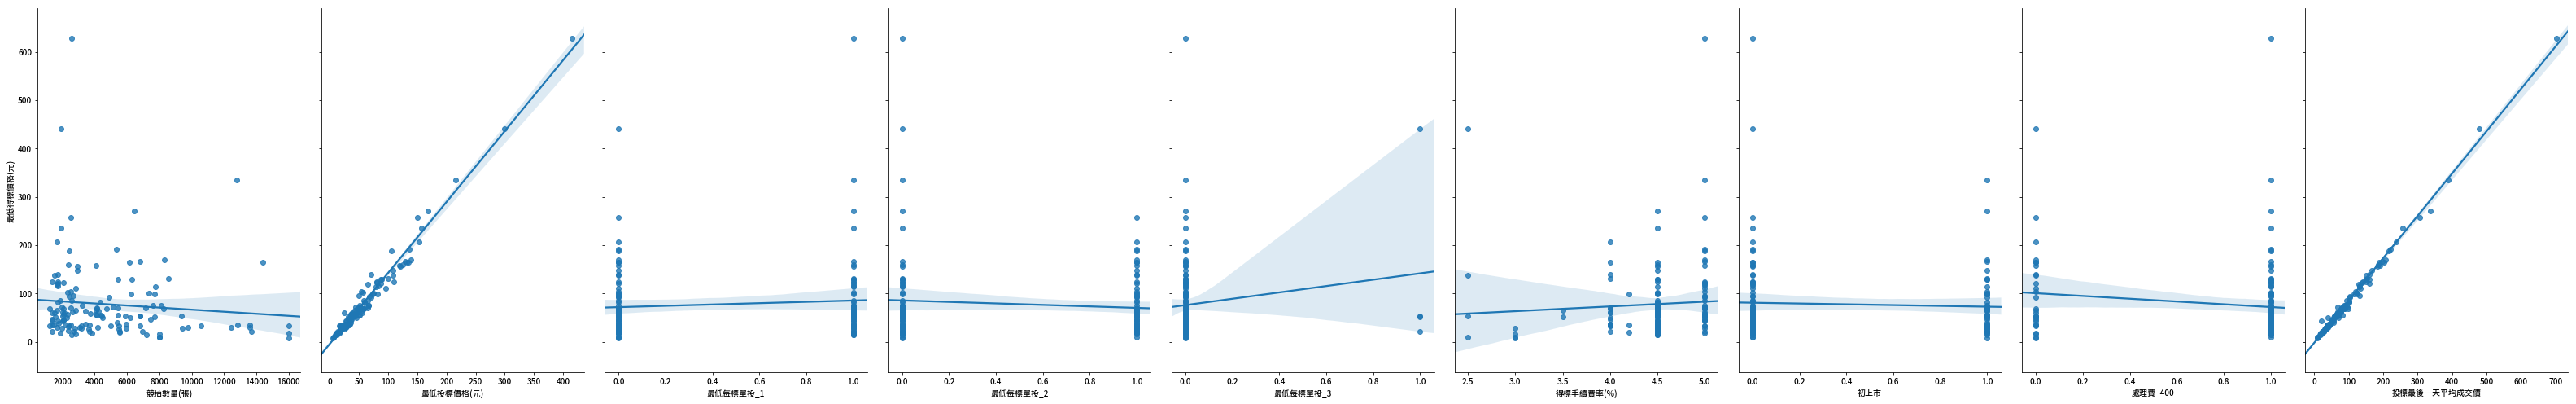

In [1740]:
sn.pairplot(df_1, x_vars=['競拍數量(張)','最低投標價格(元)','最低每標單投_1','最低每標單投_2','最低每標單投_3','得標手續費率(%)','初上市','處理費_400','投標最後一天平均成交價'], y_vars='最低得標價格(元)', size=7, aspect=0.7, kind='reg')

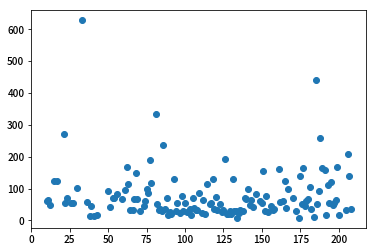

In [1741]:
plt.scatter(df_1.index, df_1['最低得標價格(元)'])

## 切資料 將最近的30筆當作test 其他的拿去train

In [1742]:
df_1['開標日期'] = pd.to_datetime(df_1['開標日期'])
df_1['開標日期']

10    2020-11-17
11    2020-11-10
12    2020-11-06
15    2020-10-16
17    2020-10-05
         ...    
200   2016-10-13
205   2016-12-05
206   2016-12-07
207   2016-12-14
208   2016-12-16
Name: 開標日期, Length: 142, dtype: datetime64[ns]

In [1743]:
df_1 = df_1.sort_values(by = '開標日期', ascending = False)
df_1.reset_index(inplace = True, drop = True)
df_1.head()

,開標日期,證券名稱,證券代號,發行市場,競拍數量(張),最低投標價格(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元),撥券日開盤價,初上市,處理費_400,最低每標單投_1,最低每標單投_2,最低每標單投_3
0,2020-11-17,亞泰金屬,6727,櫃檯買賣,2005,48.00,5.0,68.97,62.4,66.2,0,1,1,0,0
1,2020-11-10,八貫,1342,集中交易市場,4234,50.00,4.5,76.48,63.6,63.0,1,1,1,0,0
2,2020-11-06,陞達科技,4945,櫃檯買賣,2244,34.86,5.0,40.32,49.9,52.8,0,1,1,0,0
3,2020-10-16,意德士,7556,櫃檯買賣,1712,80.00,5.0,141.45,124.0,115.0,0,1,1,0,0
4,2020-10-05,軒郁,6703,櫃檯買賣,2040,80.08,5.0,138.26,123.0,125.0,0,1,1,0,0


In [1744]:
## 除了類別資料 都套上scaler
#sclaler = MinMaxScaler()
#num_vars = ['競拍數量(張)', '最低投標價格(元)', '投標最後一天平均成交價', '最低得標價格(元)', '得標手續費率(%)']
#df_1[num_vars] = sclaler.fit_transform(df_1[num_vars])
#df_1.head()

In [1745]:
## 切前30筆當作test data 剩下當作 train data
test_df = df_1.iloc[:30]
train_df = df_1.iloc[30:]

In [1746]:
def minmaxscale(x, a, b):
    min_value = x.min()
    max_value = x.max()
    scale_x = x.apply(lambda x: (x- min_value)/ (max_value - min_value)* (b-a) + a)
    return scale_x 

In [1747]:
X_train = train_df[['競拍數量(張)','最低投標價格(元)','最低每標單投_1','最低每標單投_2','最低每標單投_3','得標手續費率(%)','初上市','處理費_400','投標最後一天平均成交價']]
X_train['最後一天平均價_平方'] = [i**2 for i in X_train['投標最後一天平均成交價']]
X_train['最後一天平均價_平方'] = minmaxscale(X_train['最後一天平均價_平方'], 81, 2500)

X_train['最後一天平均價_立方'] = [i**3 for i in X_train['投標最後一天平均成交價']]
X_train['最後一天平均價_立方'] = minmaxscale(X_train['最後一天平均價_立方'], 250, 10000)
y_train = train_df['最低得標價格(元)']

In [1748]:
X_test = test_df[['競拍數量(張)','最低投標價格(元)','最低每標單投_1','最低每標單投_2','最低每標單投_3','得標手續費率(%)','初上市','處理費_400','投標最後一天平均成交價']]
X_test['最後一天平均價_平方'] = [i**2 for i in X_test['投標最後一天平均成交價']]
X_test['最後一天平均價_平方'] = minmaxscale(X_test['最後一天平均價_平方'], 81, 2500)

X_test['最後一天平均價_立方'] = [i**3 for i in X_test['投標最後一天平均成交價']]
X_test['最後一天平均價_立方'] = minmaxscale(X_test['最後一天平均價_立方'], 250, 10000)
y_test = test_df['最低得標價格(元)']

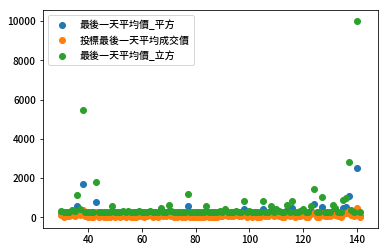

In [1749]:
plt.scatter(X_train.index, X_train['最後一天平均價_平方'])
plt.scatter(X_train.index, X_train['投標最後一天平均成交價'])
plt.scatter(X_train.index, X_train['最後一天平均價_立方'])
plt.legend()

In [1750]:
y_train.shape, X_train.shape

((112,), (112, 11))

In [1778]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif1['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
9,最後一天平均價_平方,431.13
8,投標最後一天平均成交價,246.02
10,最後一天平均價_立方,146.84
1,最低投標價格(元),81.10
5,得標手續費率(%),45.04
3,最低每標單投_2,23.20
2,最低每標單投_1,14.79
7,處理費_400,5.90
0,競拍數量(張),4.94
6,初上市,2.73


In [1752]:
x_train1 = X_train[['投標最後一天平均成交價', '得標手續費率(%)', '最低每標單投_1','最低每標單投_2','最低每標單投_3', '處理費_400', '競拍數量(張)', '初上市']]
x_train1_c = sm.add_constant(x_train1)
lm1 = sm.OLS(y_train, x_train1_c).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2032.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):          1.12e-109
Time:                        22:54:42   Log-Likelihood:                -345.40
No. Observations:                 112   AIC:                             708.8
Df Residuals:                     103   BIC:                             733.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2934      5.009      2.454      0.016       2.358      22.228
投標最後一天平均成交價     0.8705      0.007    117.264      0.000       0.856       0.885
得標手續費率(%)      -2.7386      1.048     -2.614      0.010      -4.816      -0.661
最低每標單投_1       -0.5366      3.734     -0.144      0.886      -7.943       6.869
最低每標單投_2       -1.0511      3.534     -0.297      0.767      -8.060       5.958
最低每標單投_3        3.6652      4.424      0.828      0.409      -5.110      12.440
處理費_400        -0.6222      1.440     -0.432      0.667      -3.479       2.234
競拍數量(張)     -8.706e-05      0.000     -0.485      0.629      -0.000       0.000
初上市            -1.8119      1.333     -1.359      0.177      -4.456       0.832
==============================================================================
Omnibus:                       38.051   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.551
Skew:                           0.908   Prob(JB):                     1.28e-48
Kurtosis:                       9.631   Cond. No.                     8.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1780]:
vif1 = pd.DataFrame()
vif1['features'] = x_train1.columns
vif1["VIF"] = [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,features,VIF
1,得標手續費率(%),41.43
3,最低每標單投_2,21.41
2,最低每標單投_1,13.71
5,處理費_400,5.65
6,競拍數量(張),4.24
0,投標最後一天平均成交價,2.67
7,初上市,2.47
4,最低每標單投_3,1.99


In [1754]:
x_train2 = X_train[['投標最後一天平均成交價', '得標手續費率(%)','最低每標單投_3', '初上市']]
x_train2_c = sm.add_constant(x_train2)
lm2 = sm.OLS(y_train, x_train2_c).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     4200.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):          1.27e-116
Time:                        22:54:42   Log-Likelihood:                -345.70
No. Observations:                 112   AIC:                             701.4
Df Residuals:                     107   BIC:                             715.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.0788      4.181      2.650      0.009       2.790      19.368
投標最後一天平均成交價     0.8715      0.007    126.418      0.000       0.858       0.885
得標手續費率(%)      -2.8536      0.952     -2.997      0.003      -4.741      -0.966
最低每標單投_3        4.6598      2.883      1.616      0.109      -1.056      10.375
初上市            -2.1287      1.062     -2.004      0.048      -4.235      -0.022
==============================================================================
Omnibus:                       40.816   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.058
Skew:                           0.996   Prob(JB):                     7.45e-53
Kurtosis:                       9.890   Cond. No.                         978.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1781]:
vif2 = pd.DataFrame()
vif2['features'] = x_train2.columns
vif2["VIF"] = [variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2

,features,VIF
1,得標手續費率(%),3.03
0,投標最後一天平均成交價,2.38
3,初上市,1.65
2,最低每標單投_3,1.08


In [1756]:
x_train3 = X_train[['投標最後一天平均成交價', '得標手續費率(%)', '初上市']]
x_train3_c = sm.add_constant(x_train3)
lm3 = sm.OLS(y_train, x_train3_c).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     5517.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):          5.71e-118
Time:                        22:54:43   Log-Likelihood:                -347.05
No. Observations:                 112   AIC:                             702.1
Df Residuals:                     108   BIC:                             713.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.5774      4.108      3.062      0.003       4.435      20.719
投標最後一天平均成交價     0.8736      0.007    128.242      0.000       0.860       0.887
得標手續費率(%)      -3.1983      0.935     -3.421      0.001      -5.052      -1.345
初上市            -2.1592      1.070     -2.018      0.046      -4.281      -0.038
==============================================================================
Omnibus:                       43.022   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.508
Skew:                           1.074   Prob(JB):                     2.43e-55
Kurtosis:                      10.020   Cond. No.                         936.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1757]:
x_train4 = X_train[['投標最後一天平均成交價', '得標手續費率(%)']]
x_train4_c = sm.add_constant(x_train4)
lm4 = sm.OLS(y_train, x_train4_c).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     8047.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):          4.15e-119
Time:                        22:54:43   Log-Likelihood:                -349.12
No. Observations:                 112   AIC:                             704.2
Df Residuals:                     109   BIC:                             712.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.6320      4.165      3.033      0.003       4.377      20.887
投標最後一天平均成交價     0.8745      0.007    126.840      0.000       0.861       0.888
得標手續費率(%)      -3.4172      0.942     -3.629      0.000      -5.284      -1.551
==============================================================================
Omnibus:                       43.687   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.655
Skew:                           1.058   Prob(JB):                     1.14e-61
Kurtosis:                      10.461   Cond. No.                         936.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1758]:
x_train5 = X_train[['投標最後一天平均成交價', '得標手續費率(%)','最低每標單投_3', '初上市','最後一天平均價_平方']]
x_train5_c = sm.add_constant(x_train5)
lm5 = sm.OLS(y_train, x_train5_c).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3999.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):          5.59e-119
Time:                        22:54:43   Log-Likelihood:                -335.49
No. Observations:                 112   AIC:                             683.0
Df Residuals:                     106   BIC:                             699.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.0933      3.889      2.081      0.040       0.382      15.805
投標最後一天平均成交價     0.7974      0.017     46.104      0.000       0.763       0.832
得標手續費率(%)      -1.7057      0.908     -1.878      0.063      -3.506       0.095
最低每標單投_3        0.5090      2.794      0.182      0.856      -5.030       6.048
初上市            -2.1532      0.974     -2.210      0.029      -4.085      -0.221
最後一天平均價_平方      0.0205      0.004      4.604      0.000       0.012       0.029
==============================================================================
Omnibus:                       41.569   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.875
Skew:                           1.039   Prob(JB):                     9.95e-52
Kurtosis:                       9.783   Cond. No.                     3.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1759]:
vif5 = pd.DataFrame()
vif5['features'] = x_train5.columns
vif5["VIF"] = [variance_inflation_factor(x_train5.values, i) for i in range(x_train5.shape[1])]
vif5['VIF'] = round(vif5['VIF'], 2)
vif5 = vif5.sort_values(by = "VIF", ascending = False)
vif5

,features,VIF
0,投標最後一天平均成交價,17.50
4,最後一天平均價_平方,12.27
1,得標手續費率(%),3.98
3,初上市,1.65
2,最低每標單投_3,1.23


In [1760]:
x_train6 = X_train[['投標最後一天平均成交價', '得標手續費率(%)','初上市','最後一天平均價_平方']]
x_train6_c = sm.add_constant(x_train6)
lm6 = sm.OLS(y_train, x_train6_c).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     5044.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):          7.51e-121
Time:                        22:54:44   Log-Likelihood:                -335.50
No. Observations:                 112   AIC:                             681.0
Df Residuals:                     107   BIC:                             694.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.2018      3.826      2.144      0.034       0.617      15.787
投標最後一天平均成交價     0.7966      0.017     47.582      0.000       0.763       0.830
得標手續費率(%)      -1.7248      0.898     -1.920      0.057      -3.505       0.056
初上市            -2.1565      0.970     -2.223      0.028      -4.079      -0.234
最後一天平均價_平方      0.0208      0.004      4.949      0.000       0.012       0.029
==============================================================================
Omnibus:                       41.279   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.969
Skew:                           1.031   Prob(JB):                     4.25e-51
Kurtosis:                       9.742   Cond. No.                     3.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1761]:
vif6 = pd.DataFrame()
vif6['features'] = x_train6.columns
vif6["VIF"] = [variance_inflation_factor(x_train6.values, i) for i in range(x_train6.shape[1])]
vif6['VIF'] = round(vif6['VIF'], 2)
vif6 = vif6.sort_values(by = "VIF", ascending = False)
vif6

,features,VIF
0,投標最後一天平均成交價,16.32
3,最後一天平均價_平方,10.70
1,得標手續費率(%),3.89
2,初上市,1.65


In [1762]:
x_train7 = X_train[['投標最後一天平均成交價', '得標手續費率(%)', '初上市','最後一天平均價_立方']]
x_train7_c = sm.add_constant(x_train7)
lm7 = sm.OLS(y_train, x_train7_c).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     5026.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):          9.07e-121
Time:                        22:54:44   Log-Likelihood:                -335.70
No. Observations:                 112   AIC:                             681.4
Df Residuals:                     107   BIC:                             695.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.6665      3.861      1.985      0.050       0.012      15.321
投標最後一天平均成交價     0.8307      0.011     77.475      0.000       0.809       0.852
得標手續費率(%)      -1.6791      0.904     -1.858      0.066      -3.471       0.112
初上市            -2.2505      0.972     -2.316      0.022      -4.177      -0.324
最後一天平均價_立方      0.0038      0.001      4.902      0.000       0.002       0.005
==============================================================================
Omnibus:                       44.530   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.103
Skew:                           1.100   Prob(JB):                     6.73e-61
Kurtosis:                      10.385   Cond. No.                     1.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1763]:
vif7 = pd.DataFrame()
vif7['features'] = x_train7.columns
vif7["VIF"] = [variance_inflation_factor(x_train7.values, i) for i in range(x_train7.shape[1])]
vif7['VIF'] = round(vif7['VIF'], 2)
vif7 = vif7.sort_values(by = "VIF", ascending = False)
vif7

,features,VIF
0,投標最後一天平均成交價,6.72
1,得標手續費率(%),3.66
3,最後一天平均價_立方,3.60
2,初上市,1.65


* lm2 Y ~ '投標最後一天平均成交價', '得標手續費率(%)', '初上市', '最低每標單投_3'
* lm3 Y ~ '投標最後一天平均成交價', '得標手續費率(%)', '初上市'
* lm4 Y ~ '投標最後一天平均成交價', '得標手續費率(%)'

In [1764]:
def vif_df(X):
    vif_df = pd.DataFrame()
    vif_df['features'] = X.columns
    vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by = "VIF", ascending = False)
    return(vif_df)

In [1787]:
vif_summary = vif1
trainx_list = [x_train1, x_train2,x_train3, x_train4, x_train5, x_train6, x_train7] 
for xlist in trainx_list:
    vif = vif_df(xlist)
    vif_summary = pd.merge(vif_summary, vif, on = 'features', how = 'outer')
vif_summary.columns = ['features','vif', 'vif1','vif2', 'vif3', 'vif4','vif5', 'vif6', 'vif7']
vif_summary

,features,vif,vif1,vif2,vif3,vif4,vif5,vif6,vif7
0,得標手續費率(%),41.43,41.43,3.03,3.03,2.26,3.98,3.89,3.66
1,最低每標單投_2,21.41,21.41,NaN,NaN,NaN,NaN,NaN,NaN
2,最低每標單投_1,13.71,13.71,NaN,NaN,NaN,NaN,NaN,NaN
3,處理費_400,5.65,5.65,NaN,NaN,NaN,NaN,NaN,NaN
4,競拍數量(張),4.24,4.24,NaN,NaN,NaN,NaN,NaN,NaN
5,投標最後一天平均成交價,2.67,2.67,2.38,2.27,2.26,17.50,16.32,6.72
6,初上市,2.47,2.47,1.65,1.65,NaN,1.65,1.65,1.65
7,最低每標單投_3,1.99,1.99,1.08,NaN,NaN,1.23,NaN,NaN
8,最後一天平均價_平方,NaN,NaN,NaN,NaN,NaN,12.27,10.70,NaN
9,最後一天平均價_立方,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.60


In [1766]:
model_list = [lm2, lm3, lm4]
aic = []
bic = []
mse = []
a_rsq = []

for model in model_list:
    aic.append(model.aic)
    bic.append(model.bic)
    mse.append(model.mse_resid)
    a_rsq.append(model.rsquared_adj)

select_df =  pd.DataFrame()
select_df['AIC'] = aic
select_df["BIC"] = bic
select_df['MSE'] = mse
select_df["A_RSQ"] = a_rsq
select_df.index = ['lm2', 'lm3', 'lm4']
select_df

,AIC,BIC,MSE,A_RSQ
lm2,701.393453,714.985948,29.398651,0.993435
lm3,702.095008,712.969004,29.837543,0.993337
lm4,704.238898,712.394394,30.678123,0.993149


## 殘差分析
### error terms = y_actual - y_predicted

In [1768]:
y_train_pred2 = lm2.predict(x_train2_c)
res2 = y_train - y_train_pred2
print('MSE for lm2_train: %f' %(sum([i**2 for i in res2])/ len(res2)))

y_train_pred3 = lm3.predict(x_train3_c)
res3 = y_train - y_train_pred3
print('MSE for lm3_train: %f' %(sum([i**2 for i in res3])/ len(res3)))

y_train_pred4 = lm4.predict(x_train4_c)
res4 = y_train - y_train_pred4
print('MSE for lm4_train: %f' %(sum([i**2 for i in res4])/ len(res4)))

y_train_pred5 = lm5.predict(x_train5_c)
res5 = y_train - y_train_pred5
print('MSE for lm5_train: %f' %(sum([i**2 for i in res5])/ len(res5)))

y_train_pred6 = lm6.predict(x_train6_c)
res6 = y_train - y_train_pred6
print('MSE for lm6_train: %f' %(sum([i**2 for i in res6])/ len(res6)))

y_train_pred7 = lm7.predict(x_train7_c)
res7 = y_train - y_train_pred7
print('MSE for lm7_train: %f' %(sum([i**2 for i in res7])/ len(res7)))

MSE for lm2_train: 28.086212
MSE for lm3_train: 28.771917
MSE for lm4_train: 29.856388
MSE for lm5_train: 23.405420
MSE for lm6_train: 23.412750
MSE for lm7_train: 23.495714


In [1769]:

X_test2 = X_test[['投標最後一天平均成交價', '得標手續費率(%)','最低每標單投_3', '初上市']]
x_test_lm2 = sm.add_constant(X_test2)
y_test_pred2 = lm2.predict(x_test_lm2)
res2 = y_test - y_test_pred2
print('MSE for lm2_test: %f' %(sum([i**2 for i in res2])/ len(res2)))

X_test3 = X_test[['投標最後一天平均成交價', '得標手續費率(%)', '初上市']]
x_test_lm3 = sm.add_constant(X_test3)
y_test_pred3 = lm3.predict(x_test_lm3)
res3 = y_test - y_test_pred3
print('MSE for lm3_test: %f' %(sum([i**2 for i in res3])/ len(res3)))

X_test4 = X_test[['投標最後一天平均成交價', '得標手續費率(%)']]
x_test_lm4 = sm.add_constant(X_test4)
y_test_pred4 = lm4.predict(x_test_lm4)
res4 = y_test - y_test_pred4
print('MSE for lm4_test: %f' %(sum([i**2 for i in res4])/ len(res4)))

X_test5 = X_test[['投標最後一天平均成交價', '得標手續費率(%)','最低每標單投_3', '初上市', '最後一天平均價_平方']]
x_test_lm5 = sm.add_constant(X_test5)
y_test_pred5 = lm5.predict(x_test_lm5)
res5 = y_test - y_test_pred5
print('MSE for lm5_test: %f' %(sum([i**2 for i in res5])/ len(res5)))

X_test6 = X_test[['投標最後一天平均成交價', '得標手續費率(%)', '初上市', '最後一天平均價_平方']]
x_test_lm6 = sm.add_constant(X_test6)
y_test_pred6 = lm6.predict(x_test_lm6)
res6 = y_test - y_test_pred6
print('MSE for lm6_test: %f' %(sum([i**2 for i in res6])/ len(res6)))

X_test7 = X_test[['投標最後一天平均成交價', '得標手續費率(%)', '初上市', '最後一天平均價_立方']]
x_test_lm7 = sm.add_constant(X_test7)
y_test_pred7 = lm7.predict(x_test_lm7)
res7 = y_test - y_test_pred7
print('MSE for lm7_test: %f' %(sum([i**2 for i in res7])/ len(res7)))

MSE for lm2_test: 64.931063
MSE for lm3_test: 64.540478
MSE for lm4_test: 69.856263
MSE for lm5_test: 57.890963
MSE for lm6_test: 57.819067
MSE for lm7_test: 45.345553


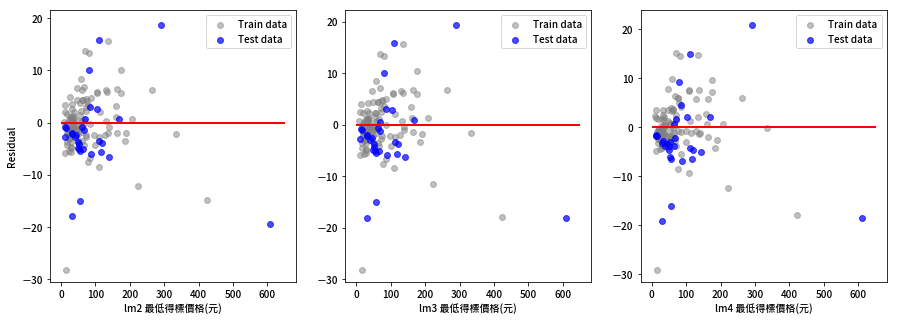

In [1770]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.scatter(y_train_pred2, y_train_pred2 - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred2, y_test_pred2 - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('lm2 最低得標價格(元)')
plt.ylabel('Residual')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 650, lw = 2, color = 'red')

plt.subplot(1,3,2)
plt.scatter(y_train_pred3, y_train_pred3 - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred3, y_test_pred3 - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('lm3 最低得標價格(元)')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 650, lw = 2, color = 'red')

plt.subplot(1,3,3)
plt.scatter(y_train_pred4, y_train_pred4 - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred4, y_test_pred4 - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('lm4 最低得標價格(元)')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 650, lw = 2, color = 'red')

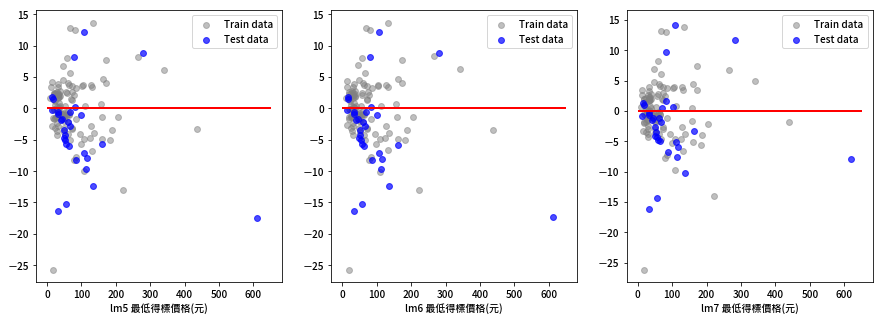

In [1771]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.scatter(y_train_pred5, y_train_pred5 - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred5, y_test_pred5 - y_test,
             c = 'blue', marker = 'o', s = 35, alpha = 0.7,
             label = 'Test data')
plt.xlabel('lm5 最低得標價格(元)')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 650, lw = 2, color = 'red')

plt.subplot(1,3,2)
plt.scatter(y_train_pred6, y_train_pred6 - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred6, y_test_pred6 - y_test,
             c = 'blue', marker = 'o', s = 35, alpha = 0.7,
             label = 'Test data')
plt.xlabel('lm6 最低得標價格(元)')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 650, lw = 2, color = 'red')

plt.subplot(1,3,3)
plt.scatter(y_train_pred7, y_train_pred7 - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred7, y_test_pred7 - y_test,
             c = 'blue', marker = 'o', s = 35, alpha = 0.7,
             label = 'Test data')
plt.xlabel('lm7 最低得標價格(元)')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 650, lw = 2, color = 'red')

## 從MSE看出lm4表現最差 所以只留下lm2和lm3進到回測階段

## 策略1: 用預測價格投1張 然後開盤賣

In [1772]:

def success_n_profit(df_stock, pred):
    df_output = pd.DataFrame()
    df_output['最低投標價格(元)'] = df_stock['最低投標價格(元)']
    df_output['最低得標價格(元)'] = df_stock['最低得標價格(元)']
    df_output['投標價'] = pred
    df_output['撥券日開盤價'] = df_stock['撥券日開盤價']
    df_output['得標'] = 0
    df_output['得標'] = np.where(df_output['投標價'] >= df_output['最低得標價格(元)'], 1, 0)
    df_output['獲利'] = np.where(df_output['得標'] == 1, (df_output['撥券日開盤價']*1000 - (500 + df_output['投標價']*1.05*1000)), -500)
    df_output['有賺錢'] = np.where(df_output['獲利'] > 0 , 1, 0)
    df_output['累積損益'] = df_output['獲利'].cumsum()

    return df_output

In [1773]:
## max_profit為用最低得標價格當投標價格

max_profit = success_n_profit(test_df, test_df['最低得標價格(元)'])
average_wins = sum(max_profit['獲利'][max_profit['獲利'] >0]) / sum(max_profit['有賺錢'])
average_loss = sum(max_profit['獲利'][max_profit['獲利'] <0]) / sum(max_profit['有賺錢'] == 0)
print('每次都用最低得標價格得標：')
print('交易次數：%i' %(len(max_profit['獲利'])))
print('勝率：%f' %(sum(max_profit['有賺錢'])/ len(max_profit['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(max_profit['獲利'])))

每次都用最低得標價格得標：
交易次數：30
勝率：0.666667
賺賠比：4.356686
獲利：234983


In [1774]:
lm2_outcome = success_n_profit(test_df, y_test_pred2)
average_wins = sum(lm2_outcome['獲利'][lm2_outcome['獲利'] >0]) / sum(lm2_outcome['有賺錢'])
average_loss = sum(lm2_outcome['獲利'][lm2_outcome['獲利'] <0]) / sum(lm2_outcome['有賺錢'] == 0)
print('lm2:')
print('交易次數：%i' %(len(lm2_outcome['獲利'])))
print('勝率：%f' %(sum(lm2_outcome['有賺錢'])/ len(lm2_outcome['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm2_outcome['獲利'])))


lm2:
交易次數：30
勝率：0.166667
賺賠比：25.361577
獲利：71645


In [1775]:
lm3_outcome = success_n_profit(test_df, y_test_pred3)
average_wins = sum(lm3_outcome['獲利'][lm3_outcome['獲利'] >0]) / sum(lm3_outcome['有賺錢'])
average_loss = sum(lm3_outcome['獲利'][lm3_outcome['獲利'] <0]) / sum(lm3_outcome['有賺錢'] == 0)
print('lm3:')
print('交易次數：%i' %(len(lm3_outcome['獲利'])))
print('勝率：%f' %(sum(lm3_outcome['有賺錢'])/ len(lm3_outcome['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm3_outcome['獲利'])))

lm3:
交易次數：30
勝率：0.166667
賺賠比：24.353574
獲利：70444


In [1776]:
lm4_outcome = success_n_profit(test_df, y_test_pred4)
average_wins = sum(lm4_outcome['獲利'][lm4_outcome['獲利'] >0]) / sum(lm4_outcome['有賺錢'])
average_loss = sum(lm4_outcome['獲利'][lm4_outcome['獲利'] <0]) / sum(lm4_outcome['有賺錢'] == 0)
print('lm4:')
print('交易次數：%i' %(len(lm4_outcome['獲利'])))
print('勝率：%f' %(sum(lm4_outcome['有賺錢'])/ len(lm4_outcome['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm4_outcome['獲利'])))

lm4:
交易次數：30
勝率：0.166667
賺賠比：17.481793
獲利：63371


In [1785]:
lm5_outcome = success_n_profit(test_df, y_test_pred5)
average_wins = sum(lm5_outcome['獲利'][lm5_outcome['獲利'] >0]) / sum(lm5_outcome['有賺錢'])
average_loss = sum(lm5_outcome['獲利'][lm5_outcome['獲利'] <0]) / sum(lm5_outcome['有賺錢'] == 0)
print('lm5:')
print('交易次數：%i' %(len(lm5_outcome['獲利'])))
print('勝率：%f' %(sum(lm5_outcome['有賺錢'])/ len(lm5_outcome['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm5_outcome['獲利'])))

lm5:
交易次數：30
勝率：0.133333
賺賠比：19.873247
獲利：37458


In [1784]:
lm6_outcome = success_n_profit(test_df, y_test_pred6)
average_wins = sum(lm6_outcome['獲利'][lm6_outcome['獲利'] >0]) / sum(lm6_outcome['有賺錢'])
average_loss = sum(lm6_outcome['獲利'][lm6_outcome['獲利'] <0]) / sum(lm6_outcome['有賺錢'] == 0)
print('lm6:')
print('交易次數：%i' %(len(lm7_outcome['獲利'])))
print('勝率：%f' %(sum(lm6_outcome['有賺錢'])/ len(lm6_outcome['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm6_outcome['獲利'])))

lm6:
交易次數：30
勝率：0.133333
賺賠比：19.859066
獲利：37550


In [1782]:
lm7_outcome = success_n_profit(test_df, y_test_pred7)
average_wins = sum(lm7_outcome['獲利'][lm7_outcome['獲利'] >0]) / sum(lm7_outcome['有賺錢'])
average_loss = sum(lm7_outcome['獲利'][lm7_outcome['獲利'] <0]) / sum(lm7_outcome['有賺錢'] == 0)
print('lm7:')
print('交易次數：%i' %(len(lm7_outcome['獲利'])))
print('勝率：%f' %(sum(lm7_outcome['有賺錢'])/ len(lm7_outcome['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm7_outcome['獲利'])))

lm7:
交易次數：30
勝率：0.166667
賺賠比：26.909940
獲利：77328


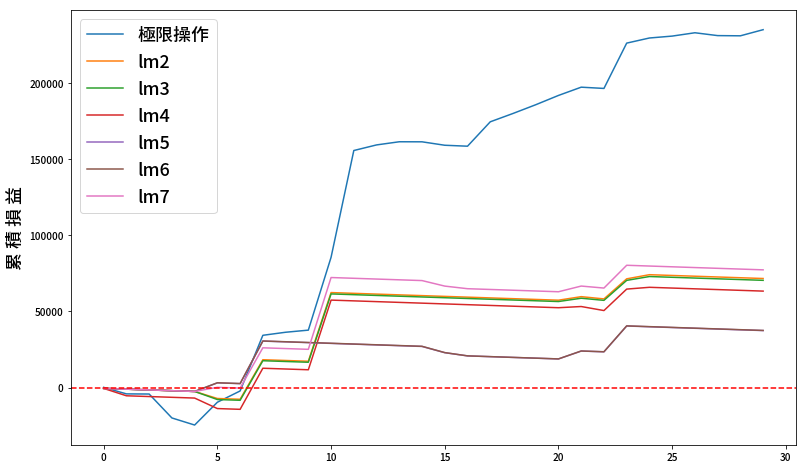

In [1786]:
plt.figure(figsize = (13, 8))
plt.plot(max_profit['累積損益'], label = '極限操作')
plt.plot(lm2_outcome['累積損益'], label = 'lm2')
plt.plot(lm3_outcome['累積損益'], label = 'lm3')
plt.plot(lm4_outcome['累積損益'], label = 'lm4')
plt.plot(lm5_outcome['累積損益'], label = 'lm5')
plt.plot(lm6_outcome['累積損益'], label = 'lm6')
plt.plot(lm7_outcome['累積損益'], label = 'lm7')


plt.axhline(0, color = 'r', linestyle = '--')
plt.ylabel('累 積 損 益', fontsize = 18)
plt.legend(fontsize = 18)

## 因為從殘差圖中發現 多花五塊錢可以多標到很多